**The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.**

---



---



## Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Read the dataset and explore the required task
df = pd.read_csv("health care diabetes.csv")

In [ ]:
df.shape

(768, 9)

In [ ]:
# Showing the columns and the outcome value 
columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
X=df[columns]
y=df["Outcome"]
X.shape,y.shape

((768, 8), (768,))

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:**

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Insights from Descriptive Analysis**

There is 768 observations of 9 variable. Independent variables are Pregnencies , Glucose, BloodPressure, Insulin, BMI and DiabetesPedigree Function. Age is Outcome Variable. Average Age of Patients are 33.24 with minimum being 21 and maximum 81. Avg. value of independent variables are Preg = 3.845052,Glucose = 120.894531, BP = 69.105469, ST=20.536458, Insulin = 79.799479, BMI = 31.992578 DPF = 0.471876 . Variation in variables can be easily observed from table below :->

In [ ]:
## 0 = Non -Diabetic
## 1 = Diabetic

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


***Treating Missing Values and Analysing Distribution of Data ***

zero is not accepted in these coloumn so that it is replaced by mean

In [ ]:
zero_not_accepted =['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in zero_not_accepted:
  df[column]= df[column].replace(0,np.NaN)
  mean = int(df[column].mean(skipna=True))   
  df[column]= df[column].replace(np.NaN, mean)                   


**checking the dataset is balanced or not**

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

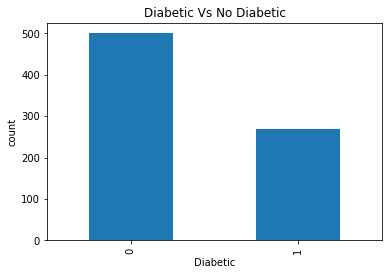

In [ ]:
df['Outcome'].value_counts().plot.bar(title = "Diabetic Vs No Diabetic", xlabel='Diabetic', ylabel='count')

By this plot we can easily see that the diabetic and non diabetic data is not evenly distributed so that it is come under unsampled data

In [ ]:
df.shape

(768, 9)

In [ ]:
positive = df[df['Outcome']==1]
positive.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,155.0,32.0,0.232,54,1
11,10,168.0,74.0,29.0,155.0,38.0,0.537,34,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
15,7,100.0,72.0,29.0,155.0,30.0,0.484,32,1


 **Visually explore these variables using histograms. **

In [ ]:
df['Glucose'].value_counts().head()

100.0    17
99.0     17
111.0    14
125.0    14
106.0    14
Name: Glucose, dtype: int64

(array([  4.,  19.,  87., 149., 166., 125.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <a list of 10 Patch objects>)

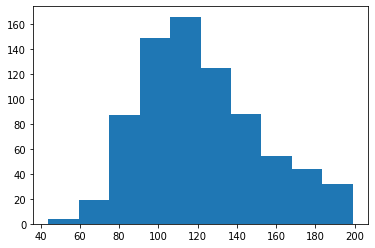

In [ ]:
plt.hist(df['Glucose'])

In [ ]:
df['BloodPressure'].value_counts().head()

72.0    79
70.0    57
74.0    52
78.0    45
68.0    45
Name: BloodPressure, dtype: int64

(array([  3.,   2.,  35., 118., 261., 214., 105.,  18.,  10.,   2.]),
 array([ 24. ,  33.8,  43.6,  53.4,  63.2,  73. ,  82.8,  92.6, 102.4,
        112.2, 122. ]),
 <a list of 10 Patch objects>)

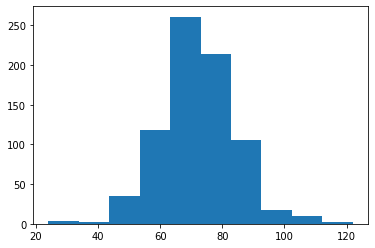

In [ ]:
plt.hist(df['BloodPressure'])

In [ ]:
df['SkinThickness'].value_counts().head()

29.0    244
32.0     31
30.0     27
27.0     23
23.0     22
Name: SkinThickness, dtype: int64

(array([ 59., 141., 408., 118.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <a list of 10 Patch objects>)

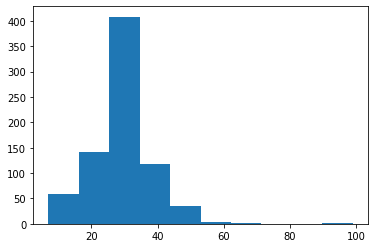

In [ ]:
plt.hist(df['SkinThickness'])

In [ ]:
df['Insulin'].value_counts().head()

155.0    378
105.0     11
130.0      9
140.0      9
120.0      8
Name: Insulin, dtype: int64

(array([142., 517.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <a list of 10 Patch objects>)

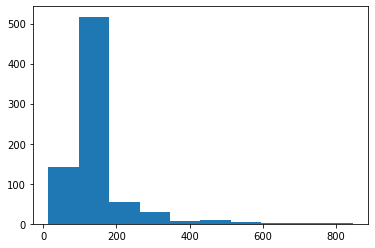

In [ ]:
plt.hist(df['Insulin'])

In [ ]:
df['BMI'].value_counts().head()

32.0    24
31.2    12
31.6    12
32.4    10
33.3    10
Name: BMI, dtype: int64

(array([ 52., 161., 207., 193.,  91.,  48.,  10.,   4.,   1.,   1.]),
 array([18.2 , 23.09, 27.98, 32.87, 37.76, 42.65, 47.54, 52.43, 57.32,
        62.21, 67.1 ]),
 <a list of 10 Patch objects>)

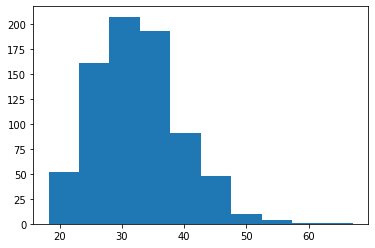

In [ ]:
plt.hist(df['BMI']) #right skewed

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.682292,30.435999,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,155.281250,85.021550,14.000,121.50000,155.0000,155.00000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**WEEK-2**

**Check the balance of the data by plotting the count of outcomes by their value**

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

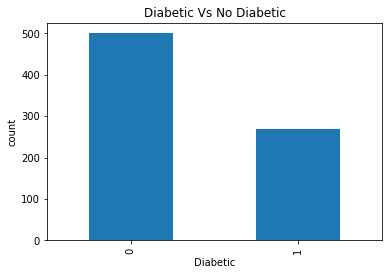

In [ ]:
df['Outcome'].value_counts().plot.bar(title = "Diabetic Vs No Diabetic", xlabel='Diabetic', ylabel='count')

(array([ 8., 10., 23., 41., 45., 40., 29., 19., 14., 17.,  9.,  4.,  3.,
         3.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([22.9 , 25.11, 27.32, 29.53, 31.74, 33.95, 36.16, 38.37, 40.58,
        42.79, 45.  , 47.21, 49.42, 51.63, 53.84, 56.05, 58.26, 60.47,
        62.68, 64.89, 67.1 ]),
 <a list of 1 Patch objects>)

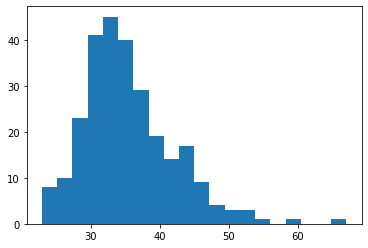

In [ ]:
plt.hist(positive['BMI'],histtype='stepfilled',bins=20)

In [ ]:
positive['BMI'].value_counts().head()

32.9    8
32.0    7
31.6    7
33.3    6
31.2    5
Name: BMI, dtype: int64

(array([ 3.,  4.,  5., 11., 14., 16., 18., 23., 20., 17., 15., 17., 14.,
        15., 15., 14., 12., 12., 10., 13.]),
 array([ 78.  ,  84.05,  90.1 ,  96.15, 102.2 , 108.25, 114.3 , 120.35,
        126.4 , 132.45, 138.5 , 144.55, 150.6 , 156.65, 162.7 , 168.75,
        174.8 , 180.85, 186.9 , 192.95, 199.  ]),
 <a list of 1 Patch objects>)

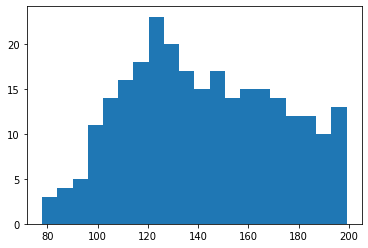

In [ ]:
plt.hist(positive['Glucose'],histtype='stepfilled',bins=20)

In [ ]:
positive['Glucose'].value_counts().head()

125.0    7
158.0    6
129.0    6
115.0    6
128.0    6
Name: Glucose, dtype: int64

(array([ 1.,  0.,  1.,  0.,  6.,  5.,  3., 17., 25., 35., 68., 30., 25.,
        23., 14.,  4.,  3.,  3.,  2.,  3.]),
 array([ 30. ,  34.2,  38.4,  42.6,  46.8,  51. ,  55.2,  59.4,  63.6,
         67.8,  72. ,  76.2,  80.4,  84.6,  88.8,  93. ,  97.2, 101.4,
        105.6, 109.8, 114. ]),
 <a list of 1 Patch objects>)

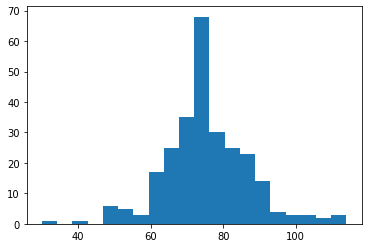

In [ ]:
plt.hist(positive['BloodPressure'],histtype='stepfilled',bins=20)

In [ ]:
positive['BloodPressure'].value_counts().head()

72.0    32
70.0    23
76.0    18
78.0    17
74.0    17
Name: BloodPressure, dtype: int64

(array([  1.,   5.,  11.,  21., 113.,  41.,  34.,  20.,  15.,   4.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 7. , 11.6, 16.2, 20.8, 25.4, 30. , 34.6, 39.2, 43.8, 48.4, 53. ,
        57.6, 62.2, 66.8, 71.4, 76. , 80.6, 85.2, 89.8, 94.4, 99. ]),
 <a list of 1 Patch objects>)

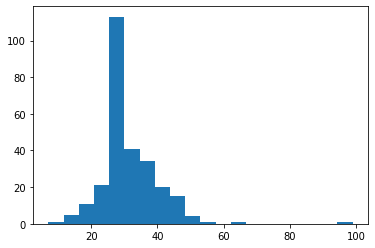

In [ ]:
plt.hist(positive['SkinThickness'],histtype='stepfilled',bins=20)

In [ ]:
positive['SkinThickness'].value_counts().head()

29.0    95
32.0    14
30.0     9
33.0     9
36.0     8
Name: SkinThickness, dtype: int64

(array([  4.,  12.,  27., 169.,  18.,  10.,   8.,   5.,   2.,   1.,   1.,
          6.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 14. ,  55.6,  97.2, 138.8, 180.4, 222. , 263.6, 305.2, 346.8,
        388.4, 430. , 471.6, 513.2, 554.8, 596.4, 638. , 679.6, 721.2,
        762.8, 804.4, 846. ]),
 <a list of 1 Patch objects>)

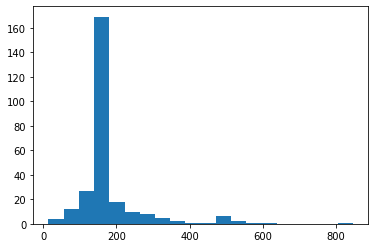

In [ ]:
plt.hist(positive['Insulin'],histtype='stepfilled',bins=20)

In [ ]:
positive['Insulin'].value_counts().head()

155.0    140
130.0      6
180.0      4
175.0      3
156.0      3
Name: Insulin, dtype: int64

###** Satter Plot**

** Create scatter charts between the pair of variables to understand the relationships. Describe your findings.**

Text(0.5, 1.0, 'Scatter plot between variables')

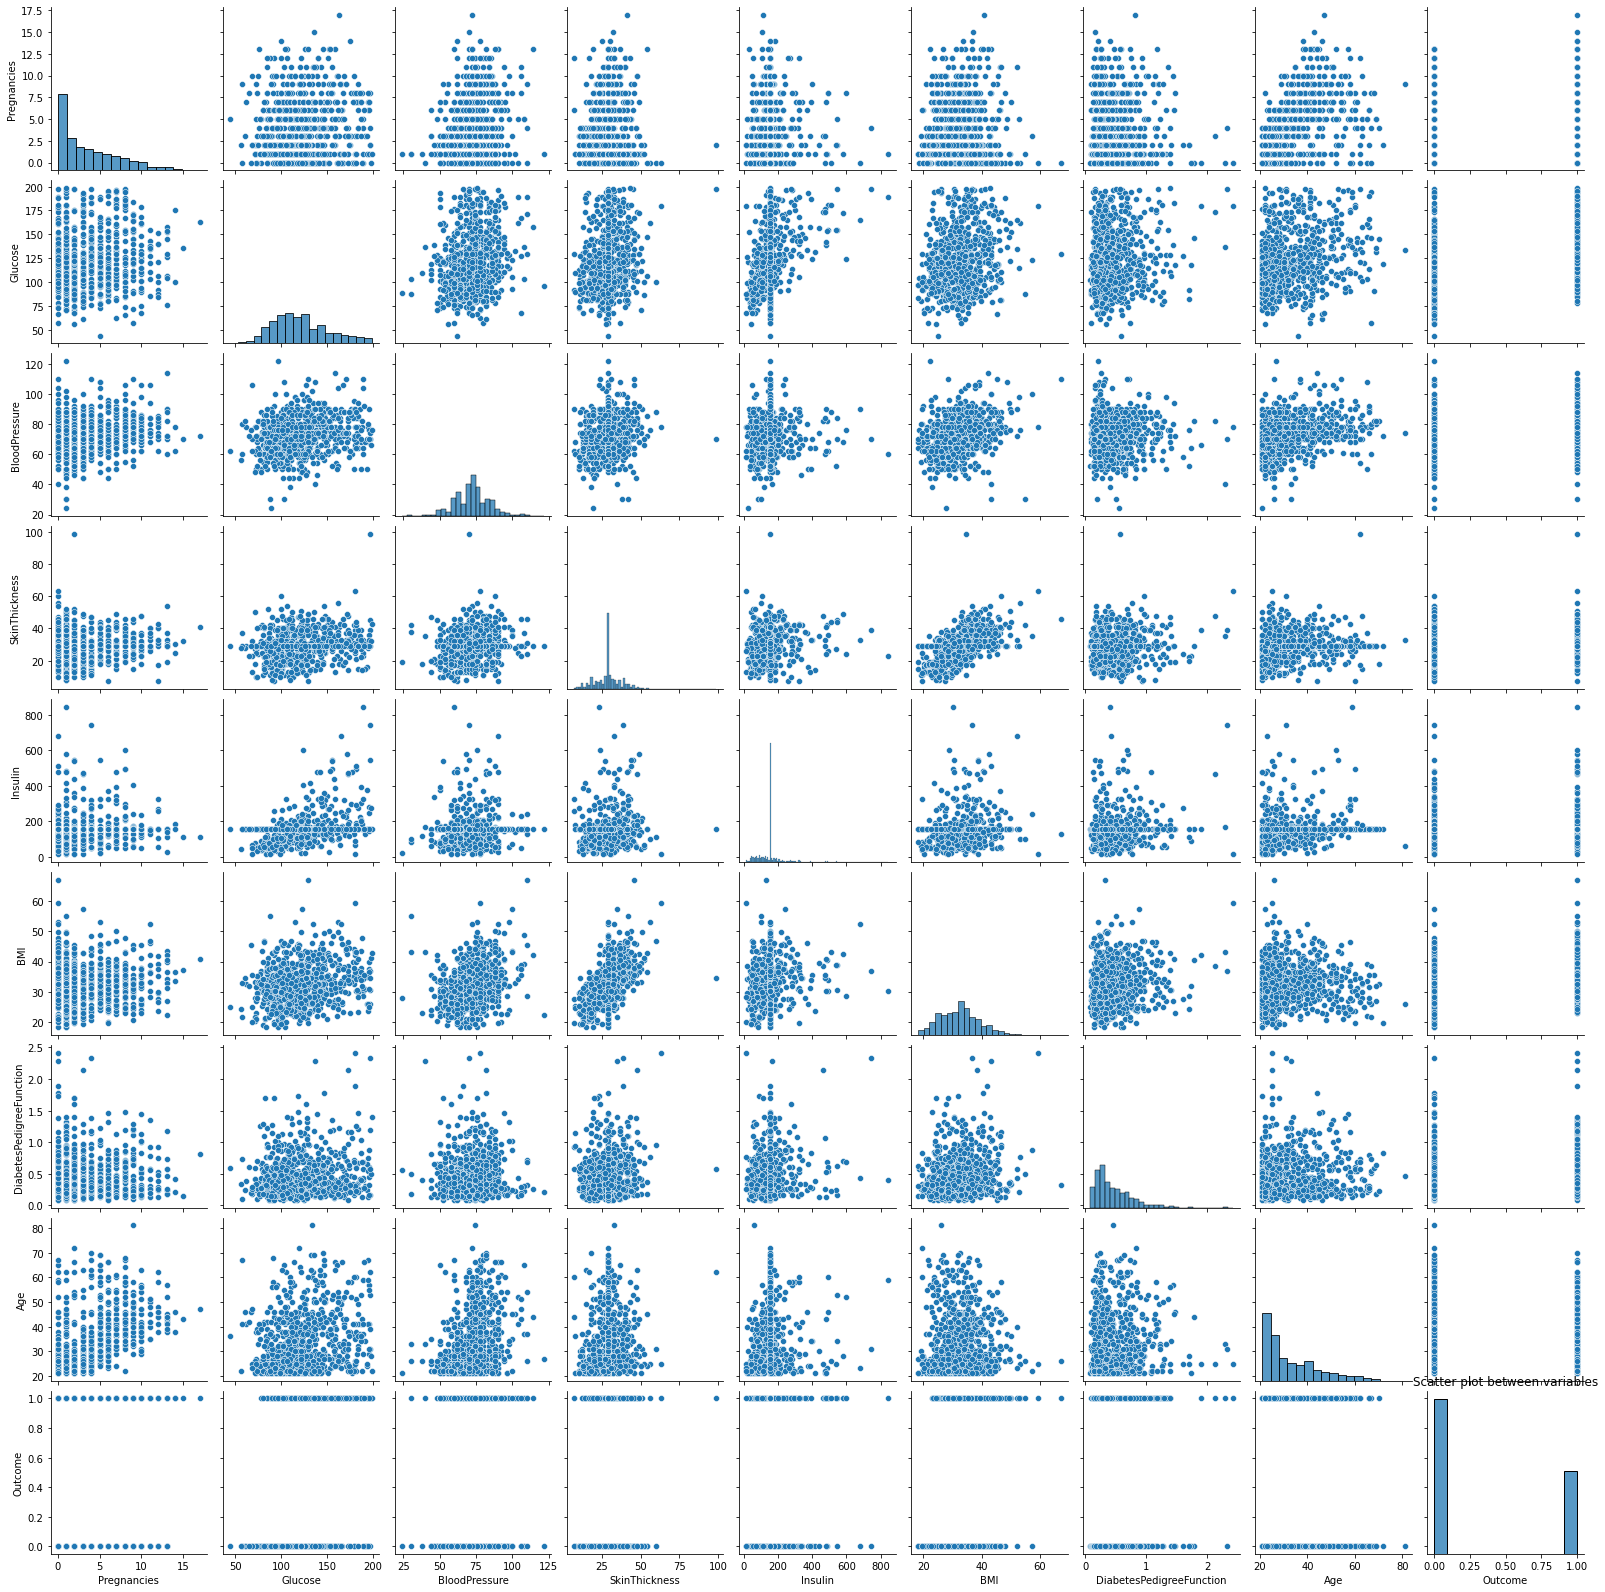

In [ ]:
sns.pairplot(df)
plt.title('Scatter plot between variables')

In [ ]:
BloodPressure = positive['BloodPressure']
Glucose = positive['Glucose']
SkinThickness = positive['SkinThickness']
Insulin = positive['Insulin']
BMI = positive['BMI']

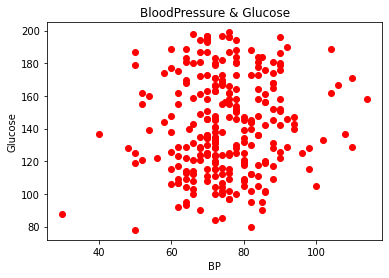

In [ ]:
plt.scatter(BloodPressure,Glucose, color=['r'])
plt.xlabel('BP')
plt.ylabel('Glucose')
plt.title('BloodPressure & Glucose')
plt.show()

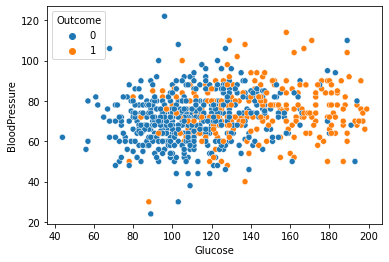

In [ ]:
g =sns.scatterplot(x="Glucose", y="BloodPressure",
                   hue="Outcome",data=df)

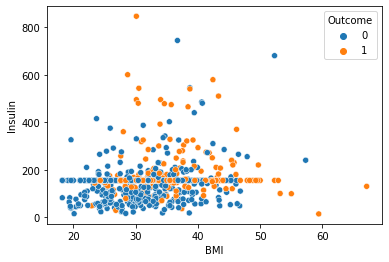

In [ ]:
B =sns.scatterplot(x="BMI", y="Insulin",
                   hue="Outcome",data=df)

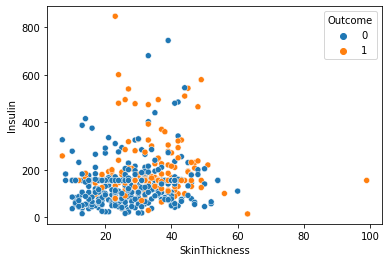

In [ ]:
S =sns.scatterplot(x="SkinThickness", y="Insulin",
                   hue="Outcome",data=df)

### **Correlation Matrix**

** Perform correlation analysis. Visually explore it using a heat map.**

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127957,0.208615,0.081770,0.055478,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127957,1.000000,0.218615,0.192677,0.420301,0.231470,0.137100,0.266591,0.492911
BloodPressure,0.208615,0.218615,1.000000,0.191892,0.072041,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192677,0.191892,1.000000,0.158133,0.543275,0.102188,0.126107,0.214873
Insulin,0.055478,0.420301,0.072041,0.158133,1.000000,0.166946,0.099170,0.136050,0.214278
BMI,0.021546,0.231470,0.281132,0.543275,0.166946,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137100,-0.002378,0.102188,0.099170,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266591,0.324915,0.126107,0.136050,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492911,0.165723,0.214873,0.214278,0.312249,0.173844,0.238356,1.000000


*We can clearly see that Glucose and BMI has good impact on outcome. There is a strong positive correlation between BMI and Skinthickness or Pregnancies and age*

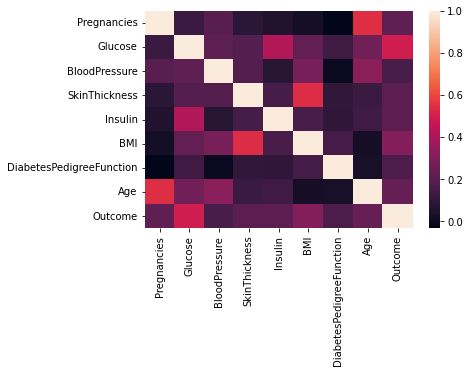

In [ ]:
sns.heatmap(df.corr())

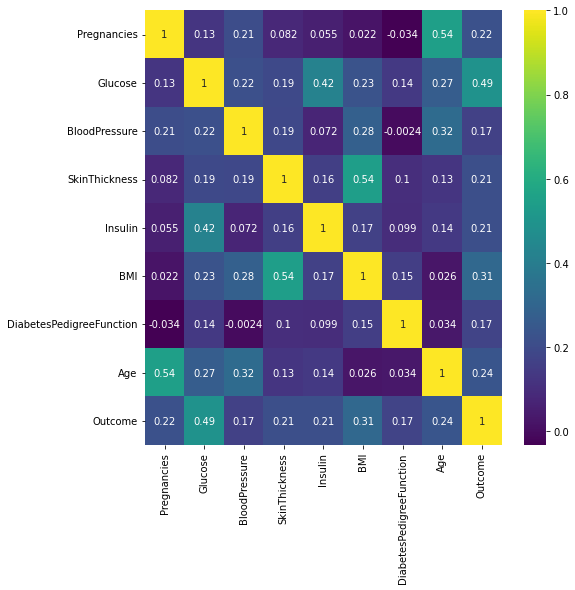

In [ ]:
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

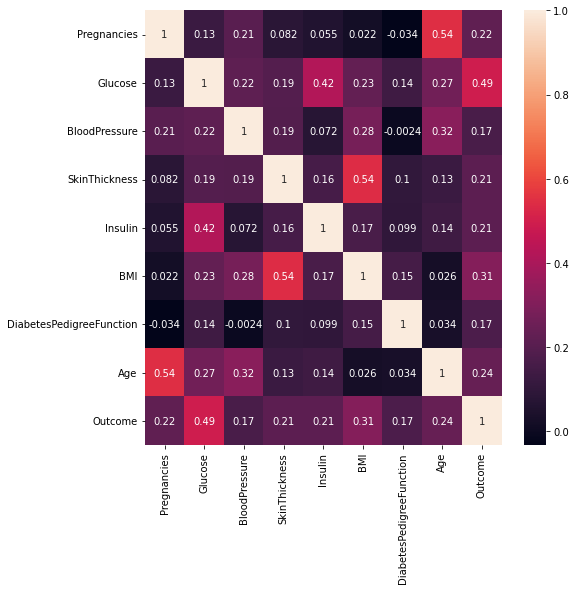

In [ ]:
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

**As we can see that our dataset is highly imbalace so that we have to first balance the dataset by using oversampling method SMOTE function**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smot=SMOTE()
X,y=smot.fit_resample(X,y)


In [ ]:
print(X.shape,y.shape)

(1000, 8) (1000,)


**The data is sampled and now the dataset is ready to move in the model buliding process**

**Model Building**

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
## features and label
features =df.iloc[:,[0,1,2,3,4,5,6,7]].values
label = df.iloc[:,8].values

## Spliting the dataset by using train test split function

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features,label,
                                                 test_size=0.2,random_state=10)

In [ ]:
## Create Model

**##Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7768729641693811
0.7402597402597403


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label,model.predict(features))
cm

array([[443,  57],
       [120, 148]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label,model.predict(features)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       500
           1       0.72      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



In [ ]:
### ROC(Receiver Operating characteristics Curve) curve

AUC: 0.84107


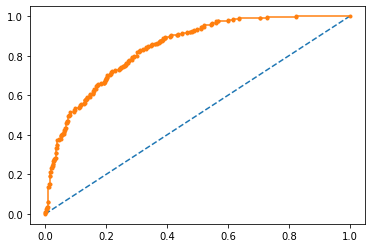

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#predict probabilities
probs = model.predict_proba(features)

## probabilities for the positive outcome only
probs = probs[:, 1]

# calculate auc
auc = roc_auc_score(label, probs)
print('AUC: %.5f' % auc)

#calculate roc curve
fpr,tpr,thresholds = roc_curve(label, probs)

# plot no skill
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr,tpr,marker ='.')

In [ ]:
## Applying Decision Tree Classifier

**## Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=5)
model3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
model3.score(X_train,y_train)

0.8192182410423453

In [ ]:
model3.score(X_test,y_test)

0.7532467532467533

In [ ]:
## applying Random Forest

**## Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4= RandomForestClassifier(n_estimators=11)
model4.fit(X_train,y_train)

RandomForestClassifier(n_estimators=11)

In [ ]:
model4.score(X_train,y_train)

0.99185667752443

In [ ]:
model4.score(X_test,y_test)

0.7597402597402597

In [ ]:
## Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
model5 = SVC(kernel='rbf',
             gamma='auto')
model5.fit(X_train,y_train)

SVC(gamma='auto')

In [ ]:
model5.score(X_train,y_train)

1.0

In [ ]:
model5.score(X_test,y_test)

0.6168831168831169

In [ ]:
### Applying K-NN

**## K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p = 2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.score(X_train,y_train)

0.7931596091205212

In [ ]:
knn.score(X_test,y_test)

0.7207792207792207

**Now we move to perform K-FOld Cross Validation with scikit Learn and going to train the model using 5 Fold cross validation and calculating the accuracy**

In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
KFold = KFold(n_splits=5,shuffle=True,random_state=10)
scores=cross_val_score(model,X,y,cv=KFold,scoring='accuracy').mean()
  
print(scores)


0.734


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

**Plotting the AUC Curve with respective models:**

In [ ]:
### ROC curve for K-NN

AUC: 0.842
True positive Rate - [0.         0.0858209  0.26119403 0.44402985 0.62313433 0.76492537
 0.91044776 0.98880597 1.        ], False positive Rate - [0.    0.002 0.012 0.054 0.138 0.262 0.452 0.656 1.   ] Threshold - [1.99084226 0.99084226 0.98435828 0.95666598 0.94912437 0.94412913
 0.93234206 0.92906178 0.92333207 0.91790737 0.89794393 0.89678495
 0.85749614 0.85615513 0.84685645 0.84480018 0.81010018 0.80939718
 0.79469677 0.79387857 0.77617898 0.77586703 0.76929978 0.76777565
 0.76556949 0.75789256 0.75215058 0.74834141 0.74732174 0.7440901
 0.74130524 0.74061281 0.74016751 0.73969704 0.72337581 0.72079076
 0.71317112 0.71224851 0.70530604 0.70526067 0.70126671 0.69794458
 0.6919951  0.68765755 0.67499313 0.67289522 0.672019   0.66879852
 0.66501489 0.65770156 0.6562057  0.65425965 0.65278644 0.64922885
 0.64563273 0.6455645  0.63033793 0.62911957 0.61309437 0.61237962
 0.60507933 0.60069482 0.59891237 0.59547295 0.58531658 0.58477374
 0.58195277 0.58162584 0.57163784 0.549

Text(0, 0.5, 'True positive Rate')

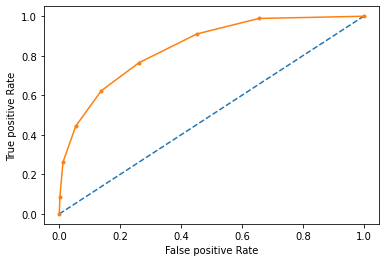

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs= knn.predict_proba(features)

## probabilities for positive outcomes only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(label, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr,threshold = roc_curve(label,probs)
print("True positive Rate - {}, False positive Rate - {} Threshold - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# roc curve for the model
plt.plot(fpr,tpr,marker='.')
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")

f1=0.626 auc=0.717 ap=0.719


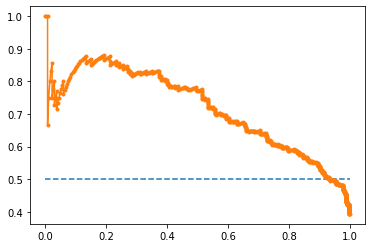

In [ ]:
#Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.663 auc=0.762 ap=0.721


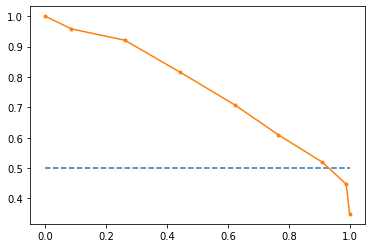

In [ ]:
#Precision Recall Curve for KNN

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = knn.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = knn.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.686 auc=0.811 ap=0.770


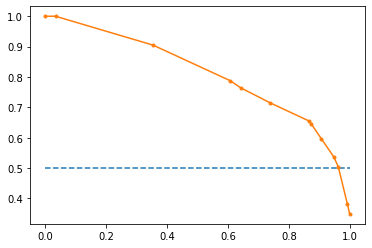

In [ ]:
#Precision Recall Curve for Decission Tree Classifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model3.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model3.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.920 auc=0.965 ap=0.957


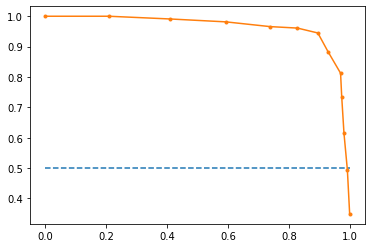

In [ ]:
#Precision Recall Curve for Random Forest

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model4.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model4.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')